In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
df = pd.read_csv('../DATA/cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
X = df.drop(columns='benign_0__mal_1' , axis=1)
y = df['benign_0__mal_1']

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

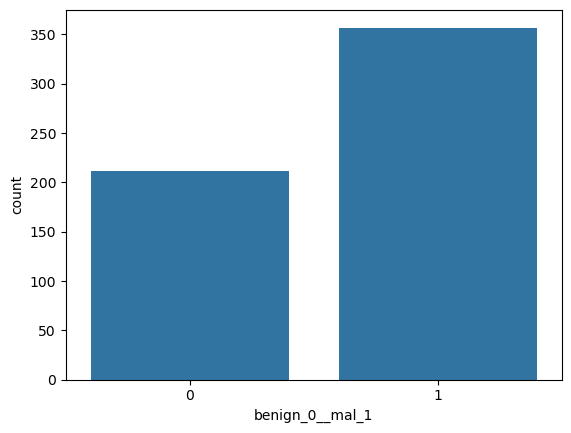

In [5]:
sns.countplot(x='benign_0__mal_1', data=df)

<Axes: >

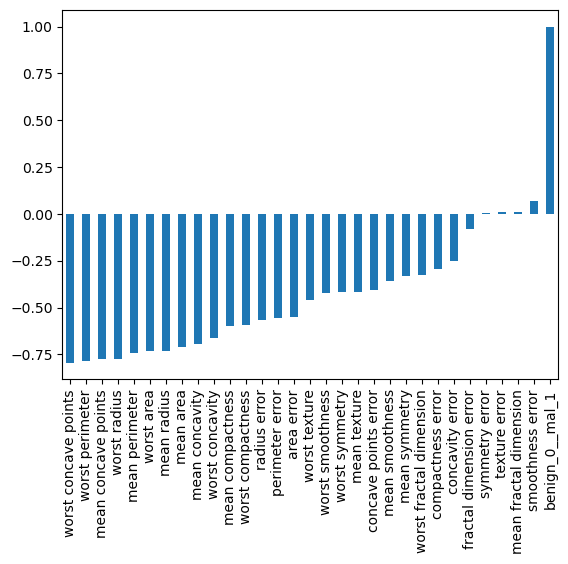

In [6]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<Axes: >

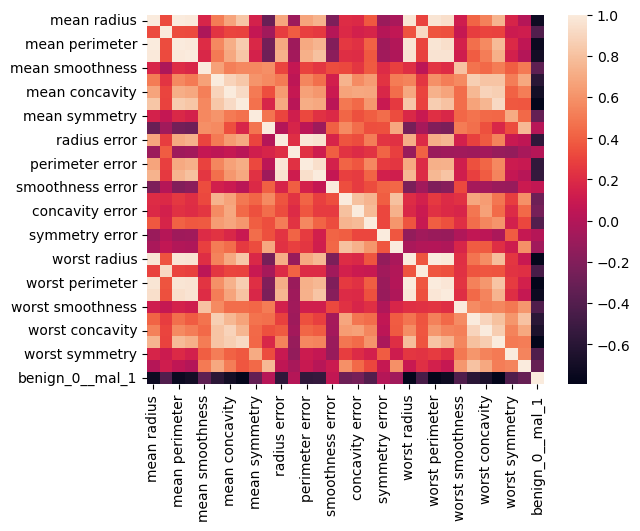

In [7]:

sns.heatmap(df.corr())

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=48)


In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [10]:
X_train.shape

(398, 30)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout



In [12]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1 , activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy')

2025-04-09 07:47:29.339410: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-04-09 07:47:29.339444: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-04-09 07:47:29.339450: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-04-09 07:47:29.339688: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-04-09 07:47:29.339701: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [13]:
model.fit( x=X_train, y=y_train, epochs=600 , validation_data=(X_test, y_test))

Epoch 1/600


2025-04-09 07:47:29.781675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-04-09 07:47:29.789685: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.6837 - val_loss: 0.6439
Epoch 2/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6245 - val_loss: 0.5845
Epoch 3/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5760 - val_loss: 0.5370
Epoch 4/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5259 - val_loss: 0.4802
Epoch 5/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4707 - val_loss: 0.4263
Epoch 6/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4263 - val_loss: 0.3825
Epoch 7/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3749 - val_loss: 0.3400
Epoch 8/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3298 - val_loss: 0.3109
Epoch 9/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3169 - val_loss: 0.2810
Epoch 10/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2758 - val_loss: 0.2622
Epoch 11/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2350 - val_loss: 0.2428
Epoch 12/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2

<Axes: >

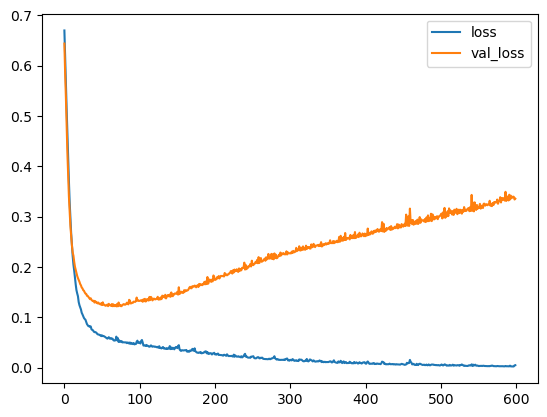

In [14]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [15]:
from tensorflow.keras.callbacks import EarlyStopping 

Early_Stop = EarlyStopping( monitor='val_loss' , mode='min' , verbose=1 , patience=20 )

In [16]:
model = Sequential()
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1 , activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy' )

In [17]:
model.fit( x=X_train, y=y_train, epochs=600 , validation_data=(X_test, y_test) , callbacks=[Early_Stop] )

Epoch 1/600


2025-04-09 07:50:42.578928: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.6783 - val_loss: 0.6887
Epoch 2/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6419 - val_loss: 0.6622
Epoch 3/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6121 - val_loss: 0.6333
Epoch 4/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6038 - val_loss: 0.5987
Epoch 5/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5754 - val_loss: 0.5682
Epoch 6/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5469 - val_loss: 0.5360
Epoch 7/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5130 - val_loss: 0.5035
Epoch 8/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4747 - val_loss: 0.4688
Epoch 9/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4229 - val_loss: 0.4292
Epoch 10/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4061 - val_loss: 0.3912
Epoch 11/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3570 - val_loss: 0.3556
Epoch 12/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3

<Axes: >

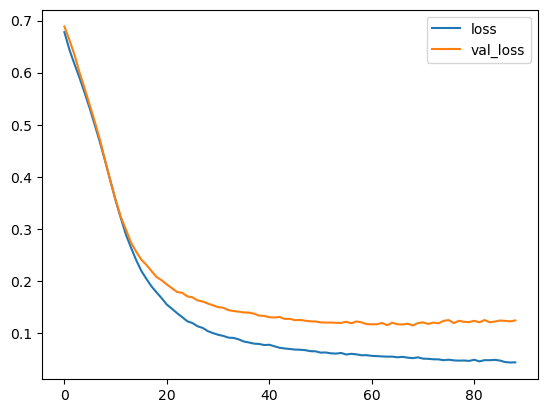

In [18]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [21]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(30, activation='relu'))
model.add( Dropout( rate=0.5 ) )

model.add(Dense(15, activation='relu'))
model.add( Dropout( rate=0.5 ) )

model.add(Dense(1 , activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy' )

model.fit( x=X_train, y=y_train, epochs=600 , validation_data=(X_test, y_test) , callbacks=[Early_Stop] )

Epoch 1/600


2025-04-09 08:33:24.659753: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.7077 - val_loss: 0.6769
Epoch 2/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6665 - val_loss: 0.6673
Epoch 3/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6611 - val_loss: 0.6509
Epoch 4/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6433 - val_loss: 0.6339
Epoch 5/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6391 - val_loss: 0.6154
Epoch 6/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6071 - val_loss: 0.5930
Epoch 7/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5889 - val_loss: 0.5717
Epoch 8/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5713 - val_loss: 0.5437
Epoch 9/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5512 - val_loss: 0.5108
Epoch 10/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5594 - val_loss: 0.4809
Epoch 11/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5158 - val_loss: 0.4553
Epoch 12/600
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4

<Axes: >

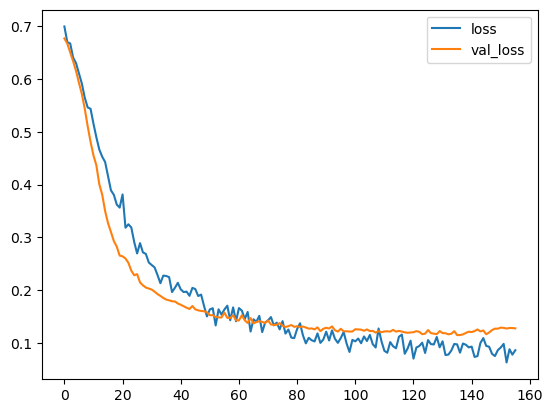

In [22]:
losses = pd.DataFrame( model.history.history )
losses.plot()

In [25]:
y_pred = model.predict(X_test) > 0.5
y_pred.astype('int32')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
    

In [26]:
y_pred = y_pred.astype('int32')

In [27]:
from sklearn.metrics import classification_report , confusion_matrix

In [30]:
print(classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        76
           1       0.96      0.98      0.97        95

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



In [31]:
print( confusion_matrix(y_test , y_pred) )

[[72  4]
 [ 2 93]]
